In [20]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [21]:
num = [1]
den = [1, 3, 2]
G = ctrl.TransferFunction(num,den)
print("Transfer Function G(s):")
print(G)

Transfer Function G(s):
<TransferFunction>: sys[13]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

        1
  -------------
  s^2 + 3 s + 2


## Step response 

là một khái niệm trong lý thuyết điều khiển, dùng để mô tả phản ứng của một hệ thống động học khi đầu vào là một tín hiệu bậc thang đơn vị.
Dùng để đánh giá đặc tính động lực học của hệ thống, ví dụ:

Độ vọt lố (overshoot)

Thời gian xác lập (settling time)

Thời gian lên (rise time)

Sai số xác lập (steady-state error)

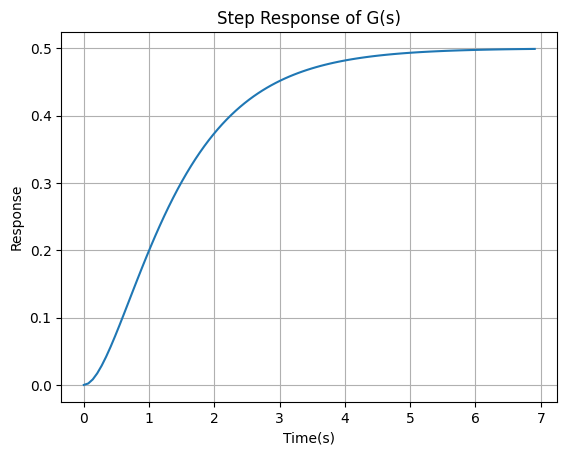

In [22]:
t, y = ctrl.step_response(G)
plt.figure()
plt.plot(t, y)
plt.title('Step Response of G(s)')
plt.xlabel('Time(s)')
plt.ylabel('Response')
plt.grid()
plt.show()
# This script defines a transfer function, computes its step response, and plots the result.
# This script uses the 'control' library to define a transfer function and compute its step response

## Biểu đồ bode gồm hai loại đồ thị

Biên độ (Magnitude plot) thể hiện độ lợi (gain) của hệ thống theo tần số  (thường tính bằng dB)

Pha (phase plot) thể hiện sự dịch pha của hệ thống theo tần số


/home/lunog/.local/lib/python3.10/site-packages/control/freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


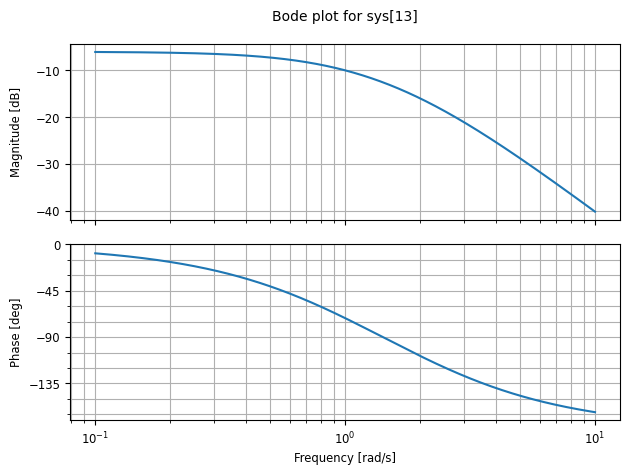

In [23]:
plt.figure()
mag, phase, omega = ctrl.bode(G, dB = True, plot = True)
plt.show()


## poles and zeros: Zero (không điểm) là điểm để tử số bằng 0 pole (cực điểm) là điểm để mẫu số bằng 0

### Poles (cực)

Nếu mọi cực có phần thực âm, hệ ổn định.

Nếu có cực ở bên phải trục ảo (phần thực dương) → hệ mất ổn định.

Quyết định dạng đáp ứng (dao động, quá độ, tắt dần nhanh/chậm).

Cực càng xa trục ảo → hệ đáp ứng nhanh.

Cực gần trục ảo → hệ chậm.

Cặp cực phức liên hợp → đáp ứng dao động.
### Zero (không)
Ảnh hưởng đến biên độ và pha trong miền tần số

Có thể làm tăng/giảm băng thông

Zeros ở nửa phẳng bên phải trục ảo (Re(z) > 0) gây ra hiện tượng non-minium phase (đáp ứng ngược chiều ban đầu)

In [24]:
poles = ctrl.poles(G)
zeros = ctrl.zeros(G)
print("Poles of G(s):", poles)
print("Zeros of G(s):", zeros)
# Poles and Zeros of the transfer function


Poles of G(s): [-2.+0.j -1.+0.j]
Zeros of G(s): []


## dc gain
trong miền tín hiệu dc là tín hiệu 0 rad/s

Lấy $lim_{\omega \to 0} \lvert G (j\omega)\rvert$ là thu được dc gain

In [25]:
dc_gain = ctrl.dcgain(G)
print("DC Gains of G(s):", dc_gain)
# DC Gain of the transfer function
# The DC gain is the steady-state gain of the system as frequency approaches zero.

DC Gains of G(s): 0.5


## Root locus
là quỹ đạo nghiệm gốc biểu đồ miêu tả sự thay đổi vị trí của các cực của hệ kín trong mặt phẳng s khi ta thay đổi một tham số của hệ thống (thường là hệ số khuếch đại K)

### ý nghĩa
Dùng để phân tích ổn định của hệ khi điều chỉnh K.

Cho thấy các cực “di chuyển” như thế nào khi ta tăng hoặc giảm độ lợi.

Giúp ta thiết kế bộ điều khiển (PID, Lead, Lag, v.v.) bằng cách đặt cực ở vị trí mong muốn (để đáp ứng nhanh, ít dao động, ổn định hơn).

### Nguyên tắc
Xuất phát từ phương trình đặc trưng của hệ kín:

\begin {equation}
1 + KG(s) = 0
\end {equation}

Các nghiệm của mẫu số (tức là cực) sẽ thay đổi theo  K
Root locus chính là đường đi của các cực này khi  K thay đổi từ $0 \to \infty$


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


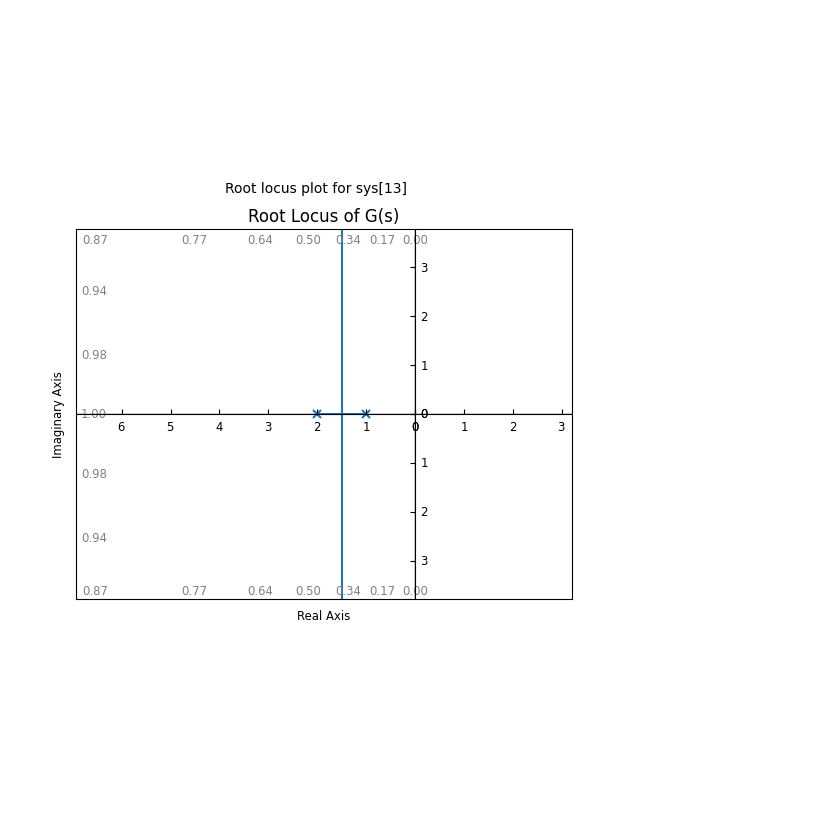

In [26]:
plt.figure()
ctrl.root_locus(G)
plt.title('Root Locus of G(s)')
plt.xlabel('Real Axis')
plt.ylabel('Imaginary Axis')
plt.grid()
plt.show()
# Root Locus of the transfer function   
# The root locus plot shows how the poles of the closed-loop system change with varying gain.

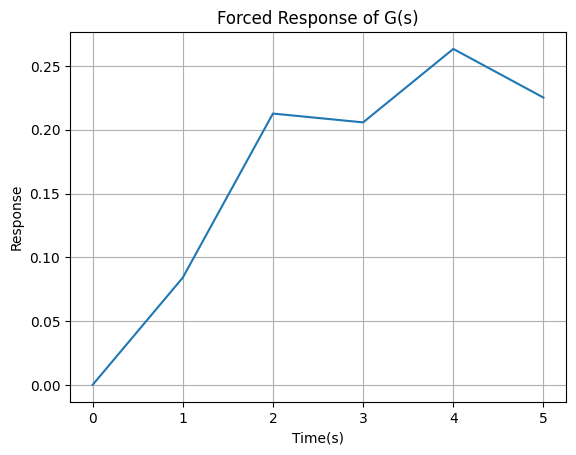

In [ ]:
a = [0, 1, 2, 3, 4, 5]
b = [0, 1, 0, 1, 0, 1]

t_2, y_2= ctrl.forced_response(G, T=a, U=b)
plt.figure()
plt.plot(t_2, y_2)
plt.title('Forced Response of G(s)')
plt.xlabel('Time(s)')
plt.ylabel('Response')
plt.grid()
plt.show()
# Forced response of the transfer function to a custom input signal
# The forced response is computed for a given time vector and input signal.